In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import sklearn as sk

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Load every available dataset.

In [2]:
%%time
adatas = []
for i, row in pd.read_csv('personal.csv').iterrows():
    try:
        adata = sc.read(f'datasets/{row.Author}_{row.Year}.h5ad')
        adata.obs['dataset'] = f'{row.Author}_{row.Year}'
        adatas.append(adata)
    except FileNotFoundError:
        pass
    
adata = ad.concat(adatas)

CPU times: user 1min 59s, sys: 2min 25s, total: 4min 24s
Wall time: 4min 26s


## Explore the data

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, frameon=False)

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


,nth condition,condition,n_samples
0,0,ELF1,11676
1,1,control,8878
2,2,CREB1,7587
3,3,ELK1,7366
4,4,INTERGENIC393453,7177


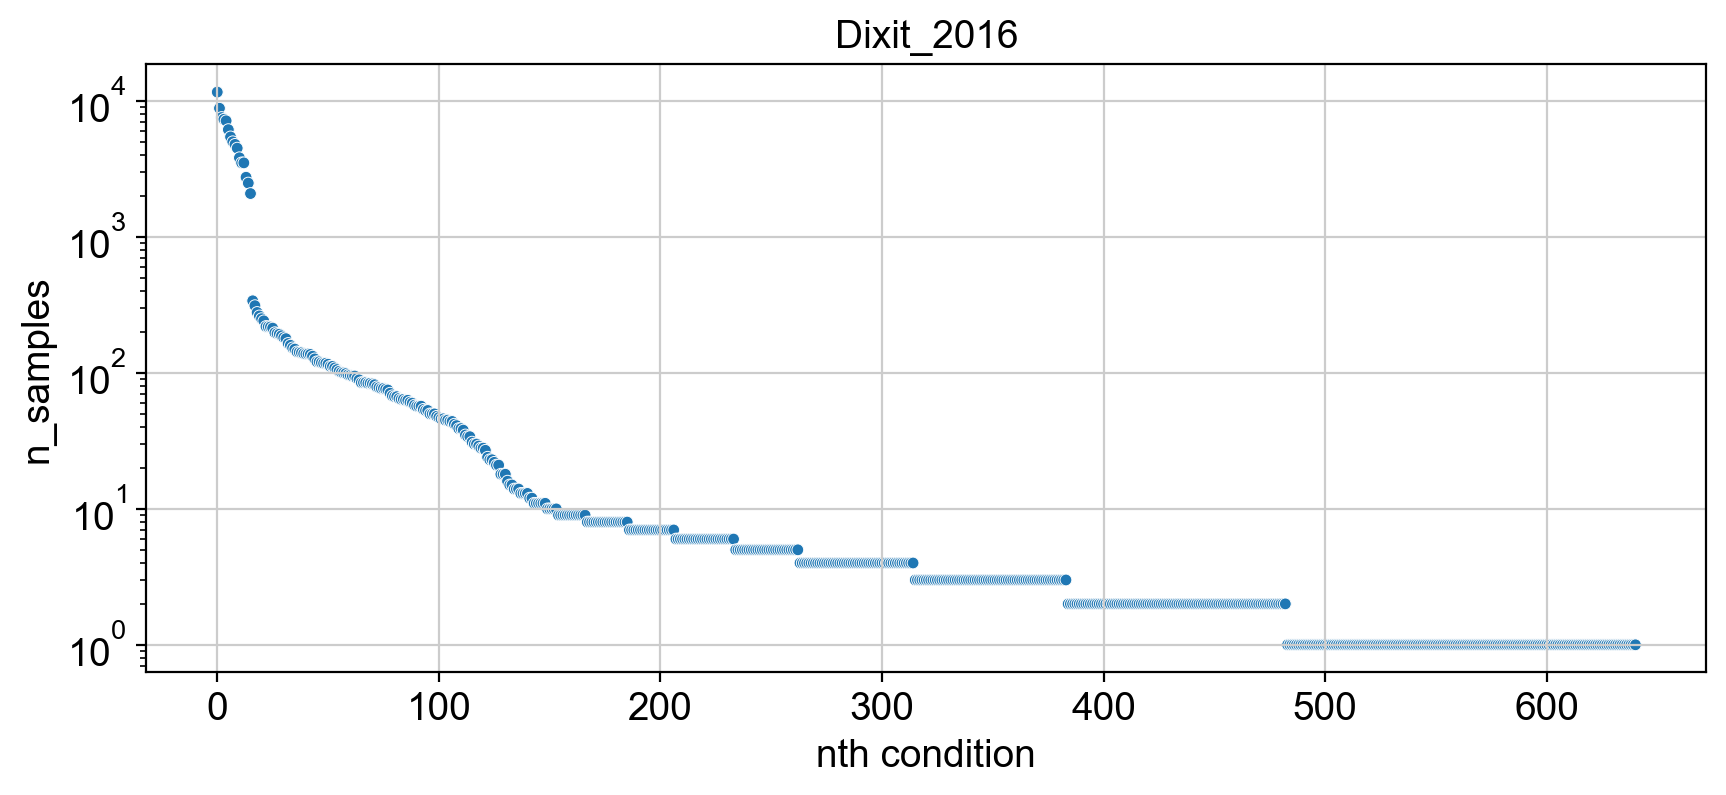

,nth condition,condition,n_samples
0,0,,11835
1,1,KLF1,1954
2,2,BAK1,1451
3,3,CEBPE,1230
4,4,"CEBPE,RUNX1T1",1215


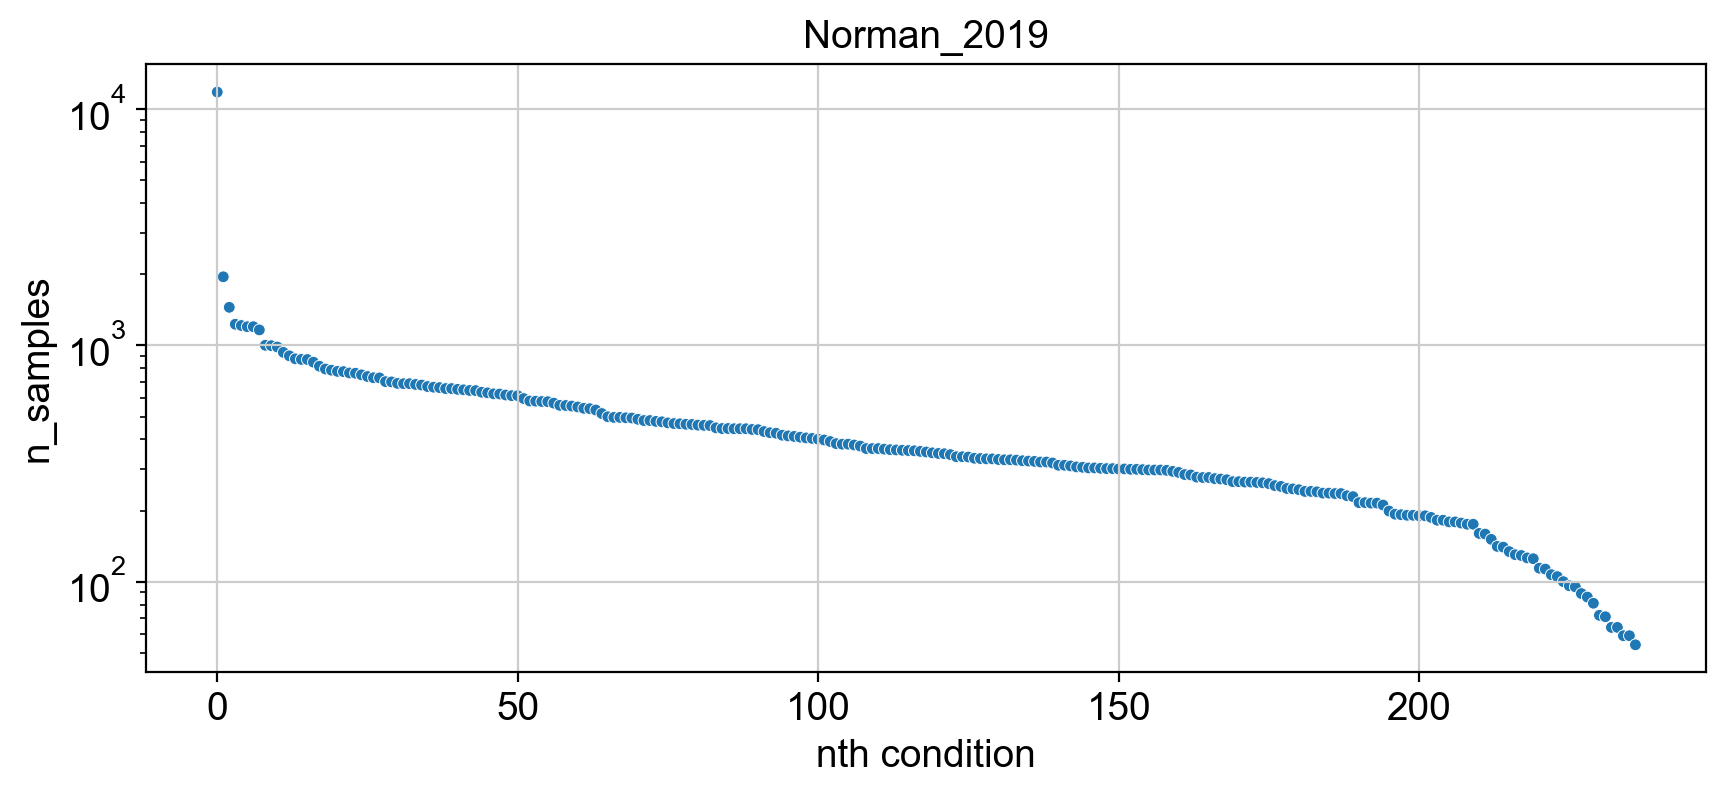

,nth condition,condition,n_samples
0,0,JAK,1503
1,1,TIMP,1483
2,2,IFNGR,1427
3,3,SLC5A,1212
4,4,NPC,1151


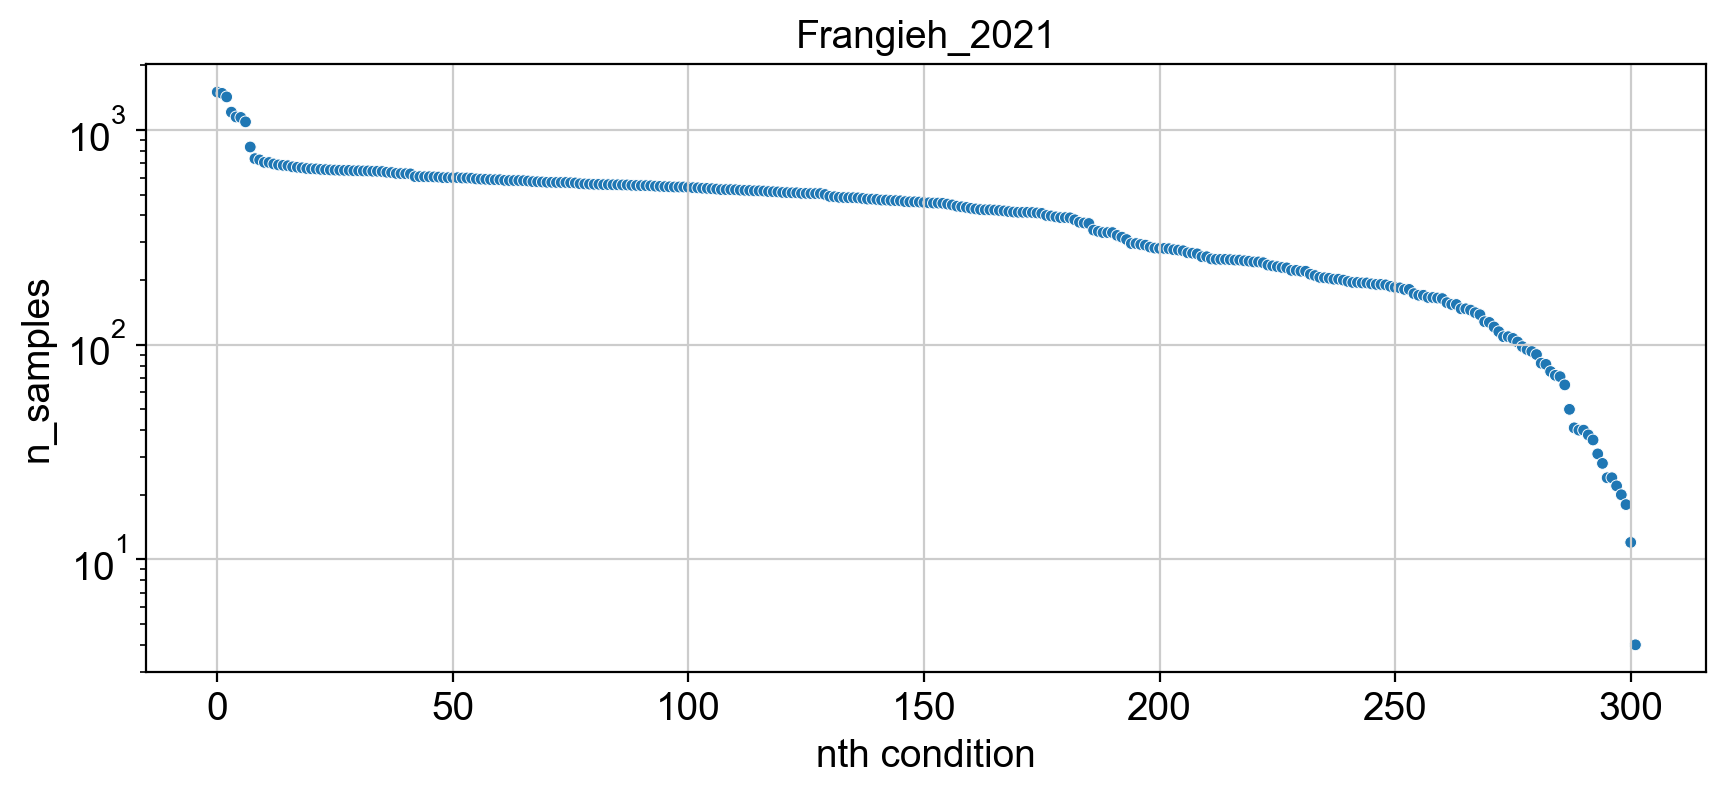

,nth condition,condition,n_samples
0,0,Vehicle,12966
1,1,PD98059,3754
2,2,Tranylcypromine,3735
3,3,WP1066,3711
4,4,RG108,3710


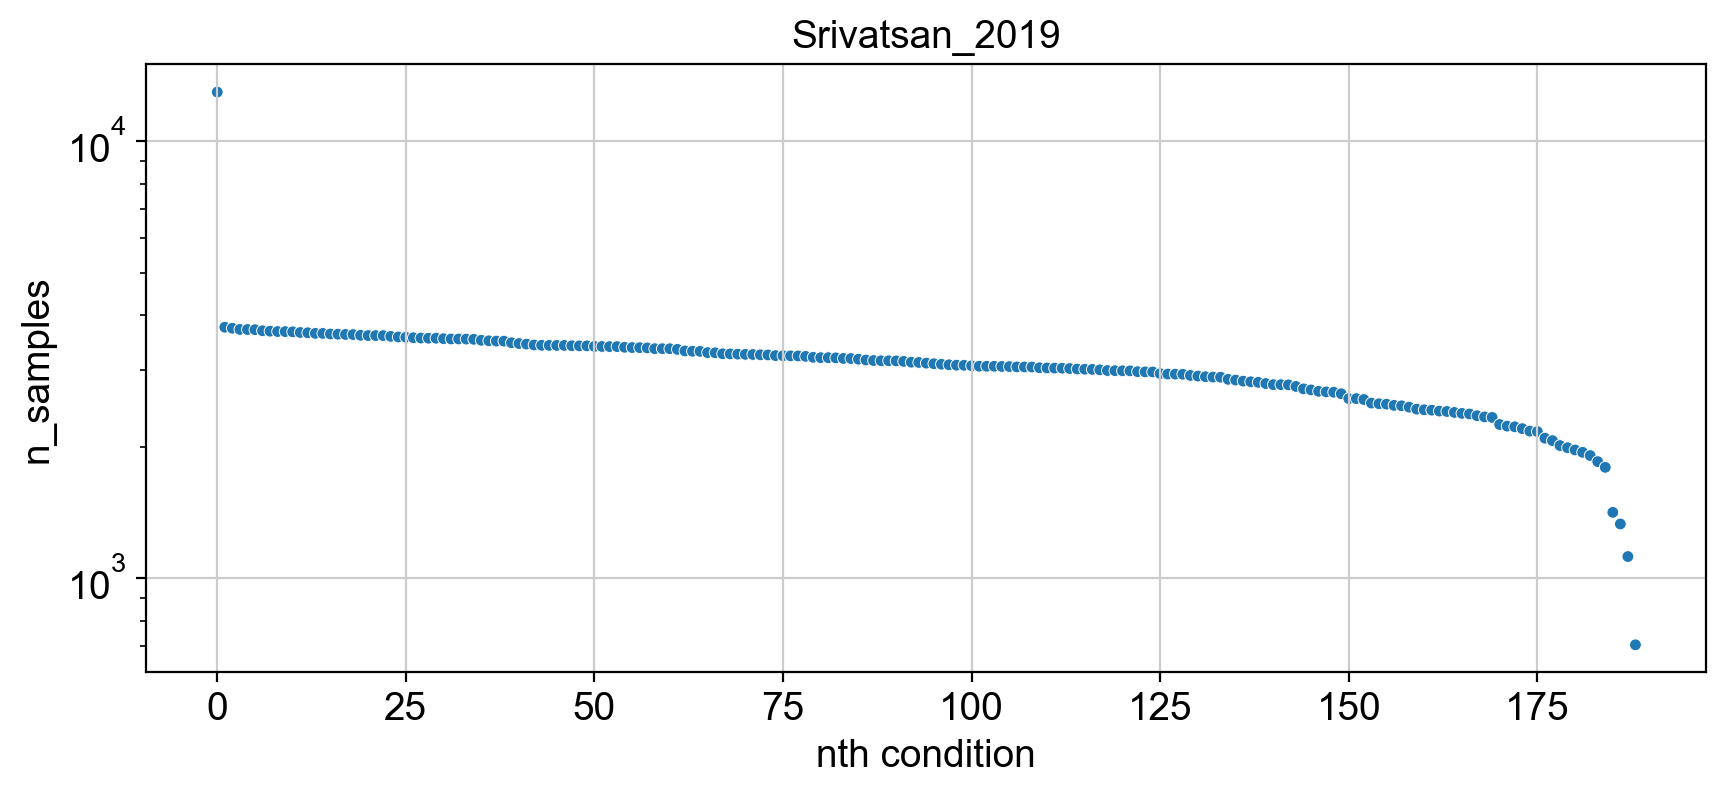

In [38]:
for a in adatas:
    df = pd.DataFrame(a.obs.perturbation_name.value_counts())
    df = df.reset_index().reset_index()
    df.columns = ['nth condition', 'condition', 'n_samples']
    display(df.head(5))

    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=df, x='nth condition', y='n_samples', size=1, legend=None)
    plt.yscale('log')
    plt.title(a.obs.dataset.values[0])
    plt.show()

Which perturbations are in these datasets?

In [26]:
df = pd.crosstab(adata.obs.perturbation_name, adata.obs.dataset)
df['sum'] = df.sum(axis=1)

In [38]:
pd.crosstab(adata.obs.perturbation_name, adata.obs.dataset)

perturbation_name
(+)-JQ1               True
2-Methoxyestradiol    True
A-366                 True
ABT-737               True
AC480                 True
                      ... 
ZC3HAV1               True
ZM 447439             True
ZNF318                True
Zileuton              True
control               True
Length: 1364, dtype: bool

In [34]:
df.sort_values(by='sum', ascending=False)[:50]

dataset,Dixit_2016,Frangieh_2021,Norman_2019,Srivatsan_2019,sum
perturbation_name,,,,,
control,8878,0,11835,0,20713
DMSO,0,0,0,12966,12966
ELF1,11676,0,0,0,11676
CREB1,7587,0,0,0,7587
ELK1,7366,0,0,0,7366
INTERGENIC393453,7177,0,0,0,7177
EGR1,6181,0,321,0,6502
GABPA,5462,0,0,0,5462
NR2C2,5030,0,0,0,5030


In [27]:
freq = ad.AnnData(df.sort_values(by='sum', ascending=False).drop('sum', axis=1))

In [28]:
freq.obs = freq.obs.reset_index()

In [29]:
freq.obs.perturbation_name.values[:20]

array(['control', 'DMSO', 'ELF1', 'CREB1', 'ELK1', 'INTERGENIC393453',
       'EGR1', 'GABPA', 'NR2C2', 'ETS1', 'E2F4', 'IRF1', 'PD98059',
       'Tranylcypromine', 'WP1066', 'RG108', 'Tubastatin A ', 'Curcumin',
       'GSK-LSD1 2', 'Busulfan '], dtype=object)

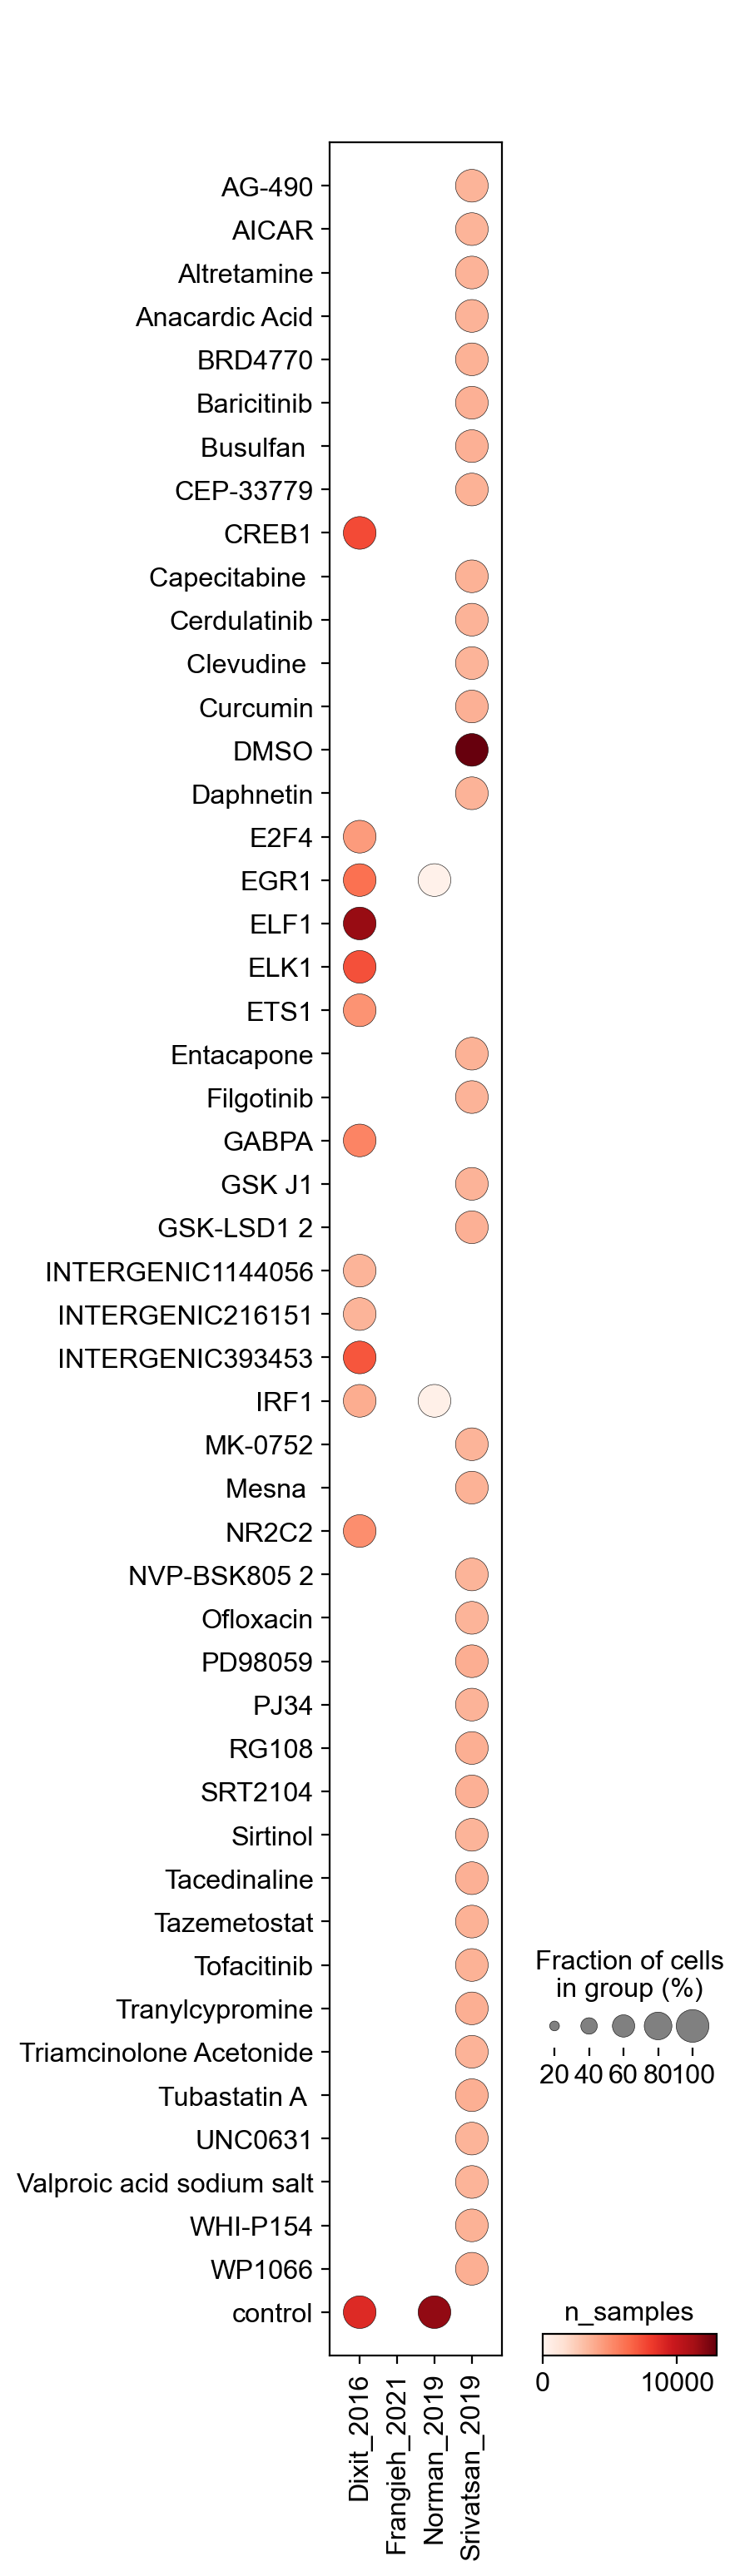

In [39]:
sc.pl.dotplot(
    freq[freq.obs.perturbation_name.isin(freq.obs.perturbation_name.values[:50])],
    var_names=freq.var_names,
    groupby='perturbation_name',
    colorbar_title='n_samples'
)

In [45]:
['a', 'b'].index('b')

1

Which perturbations exist across multiple datasets?

In [41]:
df = pd.crosstab(adata.obs.perturbation_name, adata.obs.dataset)
df = df[np.count_nonzero(df, axis=1) > 1]
df

dataset,Dixit_2016,Frangieh_2021,Norman_2019,Srivatsan_2019
perturbation_name,,,,
EGR1,6181,0,321,0
IRF1,3837,0,427,0
NCL,0,121,237,0
SET,0,415,985,0
control,8878,0,11835,0


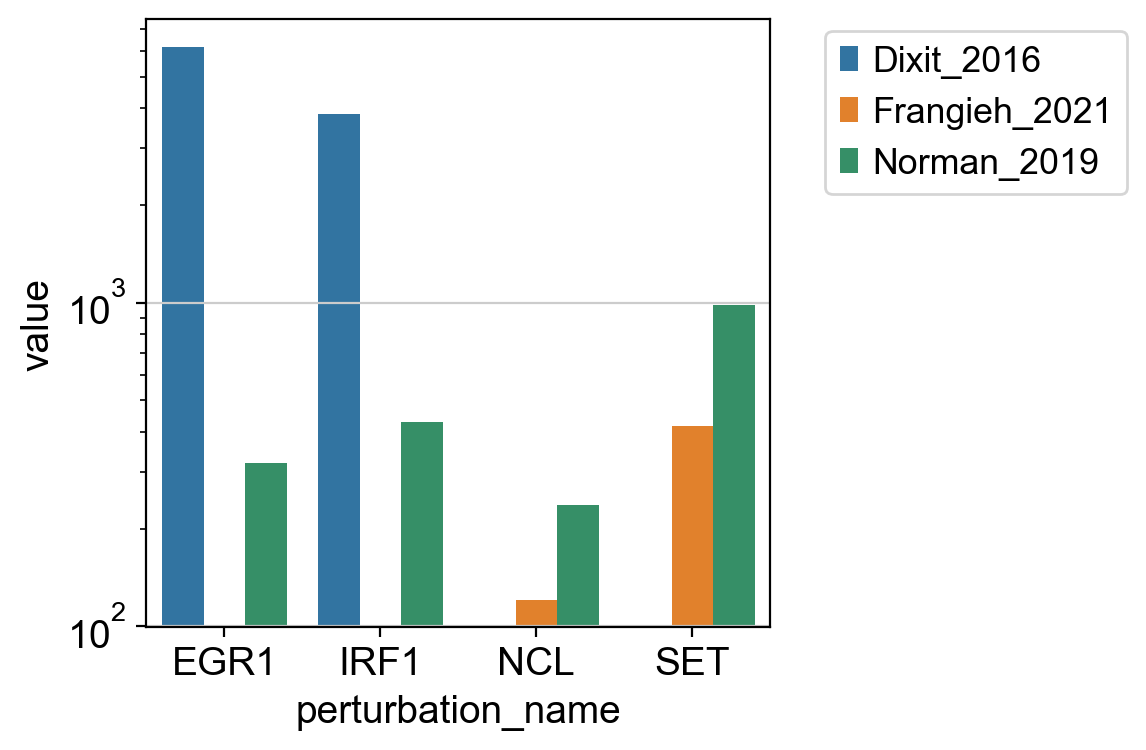

In [5]:
sns.barplot(data = df[df.columns[:3]].reset_index().melt(id_vars='perturbation_name'), x='perturbation_name', y='value', hue='dataset')
plt.yscale('log')
plt.legend(bbox_to_anchor = (1.6, 1.01));

In [8]:
import pubchempy as pcp

In [28]:
%%time
for p in adata[adata.obs.dataset == 'Srivatsan_2019'].obs.perturbation_name.unique():
    print(p)
    try:
        cid = pcp.get_cids(p, 'name', list_return='flat')
        if len(cid) > 1:
            print(cid)
        elif len(cid) == 0:
            print(f'oh no, nothing found for {p}')
        else:
            cmpd = pcp.Compound.from_cid(cid)
            if p.lower() != cmpd.synonyms[0].lower():
                print(cmpd.synonyms[:10])
    except:
        continue

Enzastaurin
Raltitrexed
Vehicle
oh no, nothing found for Vehicle
Lenalidomide
Divalproex Sodium
MLN8054
Sodium Phenylbutyrate
['Sodium 4-phenylbutyrate', 'SODIUM PHENYLBUTYRATE', '1716-12-7', 'sodium 4-phenylbutanoate', 'Buphenyl', 'TriButyrate', 'Ammonaps', 'Benzenebutanoic acid, sodium salt', '4-Phenylbutyric Acid Sodium Salt', 'sodium;4-phenylbutanoate', '4PBA', '4-phenylbutyric acid sodium', 'UNII-NT6K61736T', 'CHEBI:75316', 'NT6K61736T', 'MFCD00800247', 'DSSTox_CID_20948', 'DSSTox_RID_79606', 'DSSTox_GSID_40948', '4-Phenylbutyrate, Na', 'C10H11NaO2', 'CAS-1716-12-7', 'NSC-657802', 'NCGC00018113-03', 'NSC 657802', 'Ammonapse', 'Lunaphen', 'NaPb', 'Phenylbutyrate Na', '4-phenylbutyric acid, sodium salt', 'Sodium phenylbutyrate [USAN:BAN]', 'Buphenyl (TN)', 'EL-532', 'VP-101', 'sodium-4-phenylbutyrate', 'CHEMBL1746', 'Sodium 4-Phenylbutyrate-d11', 'Phenylbutyric acid sodium salt', 'SCHEMBL125792', '4-PB', 'ACER-001', 'Sodium 4-phenylbutyrate, 95%', 'DTXSID7040948', 'CMK-304', 'Sodium

Quisinostat
MC1568
oh no, nothing found for MC1568
Temsirolimus
[6918289, 18293306, 23724530, 148191, 53486199, 86287409, 71433778, 129317846, 23308413, 71312019, 145712265, 54608508, 71296107, 86277830, 132274070, 137295275]
IOX2
Bosutinib
Regorafenib
Aurora A Inhibitor I
ENMD-2076
Curcumin
NVP-BSK805 2
oh no, nothing found for NVP-BSK805 2
Tozasertib
Crizotinib
Panobinostat
Alvespimycin
Sorafenib Tosylate
Maraviroc
Baricitinib
Mesna 
['mesna', '19767-45-4', 'Sodium 2-mercaptoethanesulfonate', 'Mesnex', 'Uromitexan', 'Mitexan', 'Mistabron', 'Mesnum', '2-Mercaptoethanesulfonic acid sodium salt', 'Mistabronco', 'Sodium 2-mercaptoethane sulfonate', 'Ethanesulfonic acid, 2-mercapto-, monosodium salt', 'UNII-NR7O1405Q9', '2-mercaptoethanesulfonic acid sodium', 'Sodium 2-mercaptoethanesulfonate;Mesnum', 'sodium;2-sulfanylethanesulfonate', 'sodium 2-sulfanylethane-1-sulfonate', 'NR7O1405Q9', 'MFCD00007535', 'NCGC00181166-01', 'DSSTox_CID_809', 'D 7093', 'D-7093', 'DSSTox_RID_75800', 'DSSTox_

PJ34
GSK-LSD1 2
oh no, nothing found for GSK-LSD1 2
Droxinostat
Momelotinib
['Cyt387', '1056634-68-4', 'MOMELOTINIB', 'Cyt-387', 'CYT 387', 'N-(Cyanomethyl)-4-(2-((4-morpholinophenyl)amino)pyrimidin-4-yl)benzamide', 'CYT 11387', 'UNII-6O01GMS00P', 'N-(cyanomethyl)-4-(2-(4-morpholinophenylamino)pyrimidin-4-yl)benzamide', 'N-(cyanomethyl)-4-[2-[[4-(4-morpholinyl)phenyl]amino]-4-pyrimidinyl]benzamide', '6O01GMS00P', 'CHEMBL1078178', 'CYT11387', 'N-(cyanomethyl)-4-(2-((4-(4-morpholinyl)phenyl)amino)-4-pyrimidinyl)benzamide', 'N-(Cyanomethyl)-4-(2-((4-morpholinophenyl)-amino)pyrimidin-4-yl)benzamide', 'CYT-11387', 'GS-0387', 'LM-1149', 'N-(Cyanomethyl)-4-(2-((4-(morpholin-4-yl)phenyl)amino)pyrimidin-4-yl)benzamide', 'N-(cyanomethyl)-4-(2-{[4-(morpholin-4-yl)phenyl]amino}pyrimidin-4-yl)benzamide', 'Benzamide, N-(cyanomethyl)-4-(2-((4-(4-morpholinyl)phenyl)amino)-4-pyrimidinyl)-', 'benzamide, n-(cyanomethyl)-4-[2-[[4-(4-morpholinyl)phenyl]amino]-4-pyrimidinyl]-', 'Momelotinib [USAN:INN]', 'mo

Fasudil
BRD4770
WP1066
M344
Gandotinib
CUDC-101
Alisertib
AR-42
Obatoclax Mesylate
[16681698, 46930996, 71816154, 16727411, 70700268, 56843157, 56973712, 122362431]
Toremifene Citrate
Tranylcypromine
[19493, 5530, 441233, 26070]
Dacinostat
Patupilone
['Epothilone B', 'Patupilone', '152044-54-7', '(-)-Epothilone B', 'Epo B', 'Epothilon B', 'EPO 906', 'EPO906', 'EpoB', 'EPO 906A', 'UNII-UEC0H0URSE', 'Patupilone (Epothilone B)', 'GNF-PF-193', 'CHEBI:31550', 'UEC0H0URSE', 'EPO-906', 'MFCD02101921', '(1S,3S,7S,10R,11S,12S,16R)-7,11-dihydroxy-8,8,10,12,16-pentamethyl-3-((E)-1-(2-methylthiazol-4-yl)prop-1-en-2-yl)-4,17-dioxabicyclo[14.1.0]heptadecane-5,9-dione', 'Epothilone B (EPO906, Patupilone)', '(1S,3S,7S,10R,11S,12S,16R)-7,11-dihydroxy-8,8,10,12,16-pentamethyl-3-[(1E)-1-methyl-2-(2-methyl-4-thiazolyl)ethenyl]-4,17-dioxabicyclo[14.1.0]heptadecane-5,9-dione', '7,11-DIHYDROXY-8,8,10,12,16-PENTAMETHYL-3-[1-METHYL-2-(2-METHYL-THIAZOL-4-YL)VINYL]-4,17-DIOXABICYCLO[14.1.0]HEPTADECANE-5,9-DIONE'

INO-1001
oh no, nothing found for INO-1001
Streptozotocin
[29327, 5300, 2733335, 45357367, 6420074, 7067772, 6713972]
RG108
Tacedinaline
Ofloxacin
FLLL32
AG-490
['133550-30-8', 'AG-490', 'Tyrphostin B42', 'AG 490', 'Tyrphostin AG 490', 'AG490', '(E)-N-benzyl-2-cyano-3-(3,4-dihydroxyphenyl)acrylamide', 'Tyrphostin AG490', 'tyrphostin AG-490', 'AG-490 (Tyrphostin B42)', '(E)-N-benzyl-2-cyano-3-(3,4-dihydroxyphenyl)prop-2-enamide', 'N-Benzyl-2-cyano-3-(3,4-dihydroxyphenyl)acrylamide', 'alpha-Cyano-(3,4-dihydroxy)-N-benzylcinnamide', '134036-52-5', '(2E)-N-benzyl-2-cyano-3-(3,4-dihydroxyphenyl)prop-2-enamide', 'CHEMBL56543', 'SMR001230665', 'SR-01000076153', 'MFCD00236452', 'n-benzyl-3,4-dihydroxy-benzylidenecyanoacetamide', 'Tyrphostin,AG490', 'xy-phenyl)-acrylamide', 'Tocris-0414', 'Tyrphostin deriv. 42', 'BiomolKI_000025', 'Lopac-T-3434', 'BiomolKI2_000033', 'Tyrphostin AG 490, solid', 'Lopac0_001166', 'SCHEMBL93682', 'BMK1-D1', 'BSPBio_001396', 'cc-365', 'MLS002153172', 'MLS006011256',

ENMD-2076 L-(+)-Tartaric acid 
['ENMD-2076 L-(+)-Tartaric acid', 'UNII-KXQ762CQTH', 'ENMD-2076  tartrate', 'KXQ762CQTH', '1291074-87-7', 'ENMD-2076 Tartrate', '1453868-32-0  (tartrate)', 'ENMD2076', '1453868-32-0', 'ENMD-981693', '(E)-N-(5-methyl-1H-pyrazol-3-yl)-6-(4-methylpiperazin-1-yl)-2-styrylpyrimidin-4-amine (2R,3R)-2,3-dihydroxysuccinate', 'enmd-2076-l-tartaric-acid', 'SCHEMBL15239835', 'C21H25N7.C4H6O6', 'C25H31N7O6', '(2R,3R)-2,3-dihydroxybutanedioic acid;6-(4-methylpiperazin-1-yl)-N-(5-methyl-1H-pyrazol-3-yl)-2-[(E)-2-phenylethenyl]pyrimidin-4-amine', '2396AH', 'MFCD18074523', 's2018', 'CCG-269887', 'L-(+) Tartrate salt of ENMD-981693', 'X7387', 'Q27895339', '4-Pyrimidinamine, 6-(4-methyl-1-piperazinyl)-N-(5-methyl-1H-pyrazol-3-yl)-2-((1E)-2-phenylethenyl)-, (2R,3R)-2,3-dihydroxybutanedioate (1:1)', '6-(4-Methyl-1-piperazinyl)-N-(5-methyl-1H-pyrazol-3-yl)-2-[(1E)-2-phenylethenyl]-4-pyrimidinamine L-Tartrate', '6-(4-Methyl-1-piperazinyl)-N-(5-methyl-1H-pyrazol-3-yl)-2-[(E)-2-

['284028-89-3', 'XAV-939', 'XAV939', 'XAV 939', '3,5,7,8-Tetrahydro-2-[4-(trifluoromethyl)phenyl]-4H-thiopyrano[4,3-d]pyrimidin-4-one', '2-[4-(trifluoromethyl)phenyl]-1,5,7,8-tetrahydrothiopyrano[4,3-d]pyrimidin-4-one', 'CHEBI:62878', 'CID 2726824', 'C14H11F3N2OS', 'CHEMBL1086580', '2-(4-(trifluoromethyl)phenyl)-7,8-dihydro-5H-thiopyrano[4,3-d]pyrimidin-4-ol', 'MFCD16879017', '2-[4-(trifluoromethyl)phenyl]-7,8-dihydro-5H-thiino[4,3-d]pyrimidin-4-ol', '2-[4-(Trifluoromethyl)phenyl]-7,8-Dihydro-5h-Thiopyrano[4,3-D]pyrimidin-4-Ol', 'NVP-XAV-939', '2-(4-(trifluoromethyl)phenyl)-7,8-dihydro-3H-thiopyrano[4,3-d]pyrimidin-4(5H)-one', 'NVP-XAV 939', 'XAV', '3kr8', '3uh4', 'Maybridge3_005018', 'NVP-XAV939', 'cc-343', 'MLS006012021', 'SCHEMBL7783488', 'TB3748-GMP', 'SCHEMBL15315468', 'AOB4150', 'DTXSID60369423', 'XAV939,XAV-939', 'BCPP000009', 'HMS1445E02', 'HMS3414D07', 'HMS3648B17', 'HMS3654O16', 'HMS3678D07', 'HMS3743E05', 'BCP02128', 'EX-A1760', 'BDBM50188594', 'BDBM50318567', 'NSC755761', '

['219580-11-7', 'PD173074', 'PD 173074', 'PD-173074', '1-(tert-Butyl)-3-(2-((4-(diethylamino)butyl)amino)-6-(3,5-dimethoxyphenyl)pyrido[2,3-d]pyrimidin-7-yl)urea', '1-tert-butyl-3-[2-{[4-(diethylamino)butyl]amino}-6-(3,5-dimethoxyphenyl)pyrido[2,3-d]pyrimidin-7-yl]urea', 'UNII-A4TLL8634Y', 'A4TLL8634Y', 'CHEMBL189584', 'PD-0173074', 'CHEBI:63448', 'C28H41N7O3', 'MFCD08705327', '1-tert-butyl-3-(2-(4-(diethylamino)butylamino)-6-(3,5-dimethoxyphenyl)pyrido[2,3-d]pyrimidin-7-yl)urea', '1-tert-butyl-3-[2-[4-(diethylamino)butylamino]-6-(3,5-dimethoxyphenyl)pyrido[2,3-d]pyrimidin-7-yl]urea', '1-tert-butyl-3-[6-(3,5-dimethoxy-phenyl)-2-(4-diethylamino-butylamino)-pyrido[2,3-d]pyrimidin-7-yl]-urea', '3-tert-butyl-1-(2-{[4-(diethylamino)butyl]amino}-6-(3,5-dimethoxyphenyl)pyrido[2,3-d]pyrimidin-7-yl)urea', '2fgi', 'SMR000568412', 'FGF/VEGF Receptor Tyrosine Kinase Inhibitor, PD173074', 'cc-523', 'MLS001074892', 'MLS006011101', 'SCHEMBL177946', 'Pyrido[2,3-d]pyrimidine 12', 'BDBM6190', 'GTPL5037'

Busulfan 
['busulfan', '55-98-1', 'Myleran', 'Busulphan', 'Sulphabutin', 'Myelosan', 'Leucosulfan', 'Busulfex', 'Citosulfan', 'Mielucin', 'Misulban', 'Mitostan', 'Myeloleukon', 'Mylecytan', 'Sulfabutin', 'Mablin', 'Mielevcin', 'Milecitan', 'Mielosan', 'Mileran', 'butane-1,4-diyl dimethanesulfonate', 'Buzulfan', '1,4-Dimesyloxybutane', '1,4-BUTANEDIOL DIMETHANESULFONATE', 'Myeleukon', '1,4-Dimethanesulfonoxybutane', 'Tetramethylene dimethane sulfonate', '1,4-Butanediol, dimethanesulfonate', 'Busulfano', 'Busulfanum', 'Busulphane', '1,4-Dimethylsulfonyloxybutane', '1,4-Dimethanesulfonyloxybutane', '1,4-Bis(methanesulfonoxy)butane', '1,4-Butanediol dimethylsulfonate', '1,4-Dimethylsulfonoxybutane', '1,4-Bis(methanesulfonyloxy)butane', 'GT 41', 'NCI-C01592', '4-methylsulfonyloxybutyl methanesulfonate', 'CB 2041', 'AN 33501', 'Methanesulfonic acid, tetramethylene ester', 'Tetramethylene bis(methanesulfonate)', '1,4-Dimethanesulphonyloxybutane', 'NSC 750', 'NSC-750', '1,4-Butanediol dimethan

Disulfiram 
['disulfiram', 'Tetraethylthiuram disulfide', '97-77-8', 'Antabuse', 'Bis(diethylthiocarbamoyl) disulfide', 'Antabus', 'TETD', 'Alcophobin', 'Anticol', 'Esperal', 'Teturam', 'Dicupral', 'Exhorran', 'Hoca', 'Ethyldithiurame', 'Abstensil', 'Antaethyl', 'Antietanol', 'Antivitium', 'Contralin', 'Tetradine', 'Tetraetil', 'Teturamin', 'Abstinil', 'Abstinyl', 'Antadix', 'Antalcol', 'Antetan', 'Antetil', 'Antietil', 'Antikol', 'Aversan', 'Averzan', 'Cronetal', 'Krotenal', 'Refusal', 'Etabus', 'Ethyl tuads', 'Ethyl Thiram', 'Ethyl Thiurad', 'Ethyl Tuex', 'Antaenyl', 'Antaetil', 'Antiaethan', 'Contrapot', 'Disulfan', 'Disulfuram', 'Ephorran', 'Stopetyl', 'Thiuranide', 'Anteyl', 'Bonibal', 'Disetil', 'Nocbin', 'Tenurid', 'Tenutex', 'Tetidis', 'Ekagom TEDS', 'Ekagom TETDS', 'Ethyldithiourame', 'Noxal', 'Anti-ethyl', 'Alk-aubs', 'Thiuram E', 'TATD', 'Soxinol TET', 'Tetraethylthiram disulfide', 'Ekagom DTET', 'Accel TET', 'Espenal', 'Exhoran', 'Sanceler TET-G', 'Ro-sulfiram', 'Tetraethyl

Meprednisone
Luminespib
Cediranib
SGI-1776 free base
['SGI-1776', '1025065-69-3', 'SGI-1776 free base', 'N-[(1-methylpiperidin-4-yl)methyl]-3-[3-(trifluoromethoxy)phenyl]imidazo[1,2-b]pyridazin-6-amine', 'SGI1776', 'SGI 1776', 'N-((1-methylpiperidin-4-yl)methyl)-3-(3-(trifluoromethoxy)phenyl)imidazo[1,2-b]pyridazin-6-amine', 'UNII-72AUA0603W', 'N-[(1-Methyl-4-piperidinyl)methyl]-3-[3-(trifluoromethoxy)phenyl]-imidazo[1,2-b]pyridazin-6-amine', 'CHEMBL1952329', '72AUA0603W', 'CHEMBL1952141', 'Imidazo[1,2-b]pyridazin-6-amine, N-[(1-methyl-4-piperidinyl)methyl]-3-[3-(trifluoromethoxy)phenyl]-;Imidazo[1,2-b]pyridazin-6-amine, N-[(1-methyl-4-piperidinyl)methyl]-3-[3-(trifluoromethoxy)phenyl]-', 'Imidazo(1,2-b)pyridazin-6-amine, N-((1-methyl-4-piperidinyl)methyl)-3-(3-(trifluoromethoxy)phenyl)-', 'Imidazo[1,2-b]pyridazin-6-amine, N-[(1-methyl-4-piperidinyl)methyl]-3-[3-(trifluoromethoxy)phenyl]-', 'N-((1-Methylpiperidin-4-yl)methyl)-3-(3-(trifluoromethoxy)phenyl)imidazo(1,2-b)pyridazin-6-amin

['4-Iodo-3-nitrobenzamide', 'Iniparib', '160003-66-7', 'BSI-201', 'Iniparib (BSI-201)', 'BSI 201', 'SAR240550', 'Benzamide, 4-iodo-3-nitro-', 'IND-71677', 'BSI201', 'UNII-2ZWI7KHK8F', 'NSC-746045', '2ZWI7KHK8F', 'NIBA', 'INO2BA', 'Iniparib [USAN:INN]', '4tki', 'SAR-240550', 'Iniparib (USAN/INN)', 'BSI-201 - Iniparib', '4-iodo-5-nitro-benzamide', 'C7H5IN2O3', 'cc-485', 'MLS006010066', 'SCHEMBL242006', 'GTPL8360', 'CHEMBL1170047', 'SCHEMBL15427439', 'CHEBI:95067', 'AOB6726', 'DTXSID30166784', 'BCPP000313', 'HMS3426C05', 'HMS3654K17', 'ACT06800', 'BCP01784', 'MFCD11110639', 'NSC752493', 's1087', 'ZINC33963533', '4-Iodo-3-nitro-benzamide;BSI-201', 'AKOS015853763', 'AKOS032949733', 'AS05898', 'BCP9000455', 'CCG-264813', 'CM13181', 'CS-0145', 'DB13877', 'GS-4311', 'LS10089', 'NSC-752493', 'QC-4931', 'NCGC00263096-01', 'AC-26931', 'AM803278', 'HY-12015', 'SMR004701226', 'AB0021197', 'DB-064321', 'FT-0670350', 'SW218112-2', 'V2440', '4-Oxo-1,4-dihydro-quinoline-6-carboxylicacid', 'EC-000.2329'

In [23]:
cid

[176167]

In [14]:
cid = pcp.get_cids('panobinostat', 'name', list_return='flat')[0]
cmpd = pcp.Compound.from_cid(cid)

In [16]:
cmpd.synonyms

['Panobinostat',
 '404950-80-7',
 'LBH589',
 'Farydak',
 'LBH-589',
 'Faridak',
 'LBH 589',
 'Panobinostat (LBH589)',
 '(E)-N-Hydroxy-3-(4-(((2-(2-methyl-1H-indol-3-yl)ethyl)amino)methyl)phenyl)acrylamide',
 'NVP-LBH589',
 'NVP-LBH-589',
 'UNII-9647FM7Y3Z',
 'LBH-589B',
 'CHEBI:85990',
 '9647FM7Y3Z',
 '404950-80-7 (free base)',
 '(E)-N-HYDROXY-3-(4-{[2-(2-METHYL-1H-INDOL-3-YL)-ETHYLAMINO]-METHYL}-PHENYL)-ACRYLAMIDE',
 '(E)-N-hydroxy-3-[4-[[2-(2-methyl-1H-indol-3-yl)ethylamino]methyl]phenyl]prop-2-enamide',
 'Farydak (TN)',
 '(2E)-N-hydroxy-3-[4-({[2-(2-methyl-1H-indol-3-yl)ethyl]amino}methyl)phenyl]acrylamide',
 '(2E)-N-hydroxy-3-[4-({[2-(2-methyl-1H-indol-3-yl)ethyl]amino}methyl)phenyl]prop-2-enamide',
 '(E)-N-hydroxy-3-(4-((2-(2-methyl-1H-indol-3-yl)ethylamino)methyl)phenyl)acrylamide',
 '2-Propenamide, N-hydroxy-3-[4-[[[2-(2-methyl-1H-indol-3-yl)ethyl]amino]methyl]phenyl]-, (2E)-',
 'Panobinostat [USAN:INN]',
 '2-Propenamide, N-hydroxy-3-(4-(((2-(2-methyl-1H-indol-3-yl)ethyl)amino)m

## Train a model

Let's train the simplest model we can - a sgRNA classifier. From the weights of the model, you could extract common features of the sgRNA's effect.

In [43]:
# subset data
subset = adata[
    adata.obs.perturbation_name.isin(['EGR1', 'IRF1', 'NCL', 'SET'])]

In [6]:
# prepare train/test split
from sklearn.model_selection import train_test_split
test_idx, train_idx = train_test_split(subset.obs.index, test_size=.2)

test = subset[test_idx]
train = subset[train_idx]

In [7]:
# train classifier
clf = sk.linear_model.LogisticRegression()
clf.fit(train.X, train.obs.perturbation_name.values)

LogisticRegression()

In [10]:
# evaluate prediction
print(sk.metrics.classification_report(
    test.obs.perturbation_name.values,
    clf.predict(test.X)
))

              precision    recall  f1-score   support

        EGR1       0.62      0.66      0.64      5246
        IRF1       0.43      0.38      0.40      3368
         NCL       0.47      0.22      0.30       290
         SET       0.79      0.91      0.84      1115

    accuracy                           0.58     10019
   macro avg       0.58      0.54      0.55     10019
weighted avg       0.57      0.58      0.57     10019



Not bad for a 4-class classification problem.

Much harder case: let's try leaving out one Norman et al. 2019 and only learn the treatments from the other two datasets. We've performed no batch correction between datasets so we would expect this to be extremely difficult for a linear model.

In [11]:
test = subset[subset.obs.dataset == 'Norman_2019']
train = subset[subset.obs.dataset != 'Norman_2019']

In [12]:
clf = sk.linear_model.LogisticRegression()
clf.fit(train.X, train.obs.perturbation_name.values)

LogisticRegression()

In [13]:
print(sk.metrics.classification_report(
    test.obs.perturbation_name.values,
    clf.predict(test.X)
))

              precision    recall  f1-score   support

        EGR1       0.14      0.46      0.22       321
        IRF1       0.17      0.37      0.23       427
         NCL       0.00      0.00      0.00       237
         SET       0.00      0.00      0.00       985

    accuracy                           0.16      1970
   macro avg       0.08      0.21      0.11      1970
weighted avg       0.06      0.16      0.09      1970



Indeed, we see that the linear model is not at all predictive due to the batch effect across datasets.